# <u> Data Bootcamp Final Project <u>
### *UCLA Graduate Admissions Dataset*
    
#### Team: *Yuyang Fu*, *Yangming Zhang*




*Data Sources: Kaggle*
https://www.kaggle.com/mohansacharya/graduate-admissions

*Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019*

# Table of Contents <br>
### [1. Introduction](#1_Introduction)<br>
### [2. Data Import](#2_Data_Import)<br>
### [3. Data Filtering and Cleaning](#3_Data_Filtering_and_Cleaning)<br>
### [4. Data Exploration and Visualization](#4_Data_Exploration_and_Visualization)<br>
### [5. Regression Analysis](#5_Regression_Analysis)<br>     
[5.1 Linear Regression Model](#5.1_Linear_Regression_Model)<br>
[5.2 DecisionTree Regresion Model](#5.2_DecisionTree_Regression_Model)<br>
[5.3 Random Forest Regression Model](#5.3_Random_Forest_Regression_Model)<br>
[5.4 KNeighbors Model](#5.4_KNeighbors_Model)<br>
[5.5 SVM Model](#5.5_SVM_Model)<br>
[5.1 OLS Model](#5.6_OLS_Model)<br>
### [6. Conclusion and Summary](#6_Conclusion_and_Summary)<br>


### <a name="1_Introduction"></a>1. Introduction 

### *This project mainly focuses on what parameters are important for a student to get into UCLA graduate school, and how these factors are interrelated among themselves. It will also help predict candidates' chances of admission given the variables.*

### <a name="2_Data_Import"></a>2. Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('Admission_Predict.csv')
df2 = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df = pd.concat([df1,df2])

#### *The dataset contains several parameters which are considered important during the application for Masters Programs <br>The parameters included are :*

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose ( out of 5 )
5. Letter of Recommendation Strength ( out of 5 ) 
6. Undergraduate GPA ( out of 10 ) 
7. Research Experience ( either 0 or 1 ) 
8. Chance of Admit ( ranging from 0 to 1 )

#### *Checking data types ( which are int64 and float64)*

In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### <a name="3_Data_Filtering_and_Cleaning"></a>3. Data Filtering and Cleaning

#### *Checking if there are any null values in the dataset*

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#### *Changing the names of columns for future editing*

In [7]:
df.rename(columns={'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score',
                   'University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit',
                  'LOR ':'LOR'},inplace=True)

In [8]:
df

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


#### _Filtering data to keep the data of admission chance over 50%_

In [9]:
df_filtered = df.query('Chance_of_Admit > 0.50')

In [10]:
df_filtered

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
10,11,325,106,3,3.5,4.0,8.40,1,0.52
11,12,327,111,4,4.0,4.5,9.00,1,0.84


#### *Returning a tuple representing the dimensionality of the dataframe*

In [11]:
df_filtered.shape

(826, 9)

#### *Grouping the chance of admit into 5 levels( which are HIGH, MEDIA HIGH, MEDIUM, MEDIUM LOW, LOW)  by the interval of 0.1*
#### *The levels of the admit chance are more understanable and visualized，what's more, differentiating the data by the same interval makes it more convenient to compare with each group*

In [12]:
def Admit_Chance_Level(df_filtered):
    if df_filtered['Chance_of_Admit'] >= 0.9:
        return 'High'
    elif 0.9 > df_filtered['Chance_of_Admit'] >= 0.8:
        return 'Medium High'
    elif 0.8 > df_filtered['Chance_of_Admit'] >= 0.7:
        return 'Medium'
    elif 0.7 > df_filtered['Chance_of_Admit'] >= 0.6:
        return 'Medium Low'
    else:
        return 'Low'

In [13]:
df_filtered['Admit_Chance_Level'] = df_filtered.apply(Admit_Chance_Level, axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_filtered

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admit_Chance_Level
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Medium High
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Medium Low
5,6,330,115,5,4.5,3.0,9.34,1,0.90,High
6,7,321,109,3,3.0,4.0,8.20,1,0.75,Medium
7,8,308,101,2,3.0,4.0,7.90,0,0.68,Medium Low
10,11,325,106,3,3.5,4.0,8.40,1,0.52,Low
11,12,327,111,4,4.0,4.5,9.00,1,0.84,Medium High


#### *Merging Enrollment Level, which is the level of a candidate who received an offer and  enrolled the school, based on admit chance level*

In [15]:
enrollment = pd.read_csv('Enrollment.csv')

In [16]:
merged = pd.merge(df_filtered,enrollment, on='Admit_Chance_Level')
merged

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admit_Chance_Level,Enrollment_Level
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High,Medium Low
1,6,330,115,5,4.5,3.0,9.34,1,0.90,High,Medium Low
2,23,328,116,5,5.0,5.0,9.50,1,0.94,High,Medium Low
3,24,334,119,5,5.0,4.5,9.70,1,0.95,High,Medium Low
4,25,336,119,5,4.0,3.5,9.80,1,0.97,High,Medium Low
5,26,340,120,5,4.5,4.5,9.60,1,0.94,High,Medium Low
6,33,338,118,4,3.0,4.5,9.40,1,0.91,High,Medium Low
7,34,340,114,5,4.0,4.0,9.60,1,0.90,High,Medium Low
8,35,331,112,5,4.0,5.0,9.80,1,0.94,High,Medium Low
9,45,326,113,5,4.5,4.0,9.40,1,0.91,High,Medium Low


#### *Setting Serial number as index, as it only serves the purpose of identifying entries and would not contribute to data exploration, visualization, and predicitons*

In [17]:
merged = merged.set_index('Serial No.')
merged 

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admit_Chance_Level,Enrollment_Level
Serial No.,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,High,Medium Low
6,330,115,5,4.5,3.0,9.34,1,0.90,High,Medium Low
23,328,116,5,5.0,5.0,9.50,1,0.94,High,Medium Low
24,334,119,5,5.0,4.5,9.70,1,0.95,High,Medium Low
25,336,119,5,4.0,3.5,9.80,1,0.97,High,Medium Low
26,340,120,5,4.5,4.5,9.60,1,0.94,High,Medium Low
33,338,118,4,3.0,4.5,9.40,1,0.91,High,Medium Low
34,340,114,5,4.0,4.0,9.60,1,0.90,High,Medium Low
35,331,112,5,4.0,5.0,9.80,1,0.94,High,Medium Low


### <a name="4_Data_Exploration_and_Visualization"></a>4. Data Exploration and Visualization

#### *Grouping and figuring out the relationship of admit chance level and having research or not*

In [18]:
groupbyed = merged.groupby('Admit_Chance_Level')
groupbyed['Research'].value_counts(normalize=True) * 100

Admit_Chance_Level  Research
High                1           100.000000
Low                 0            76.595745
                    1            23.404255
Medium              1            54.166667
                    0            45.833333
Medium High         1            87.179487
                    0            12.820513
Medium Low          0            69.729730
                    1            30.270270
Name: Research, dtype: float64

In [19]:
numerical_data = merged.iloc[:,:8]

### *The distributions of different variables*

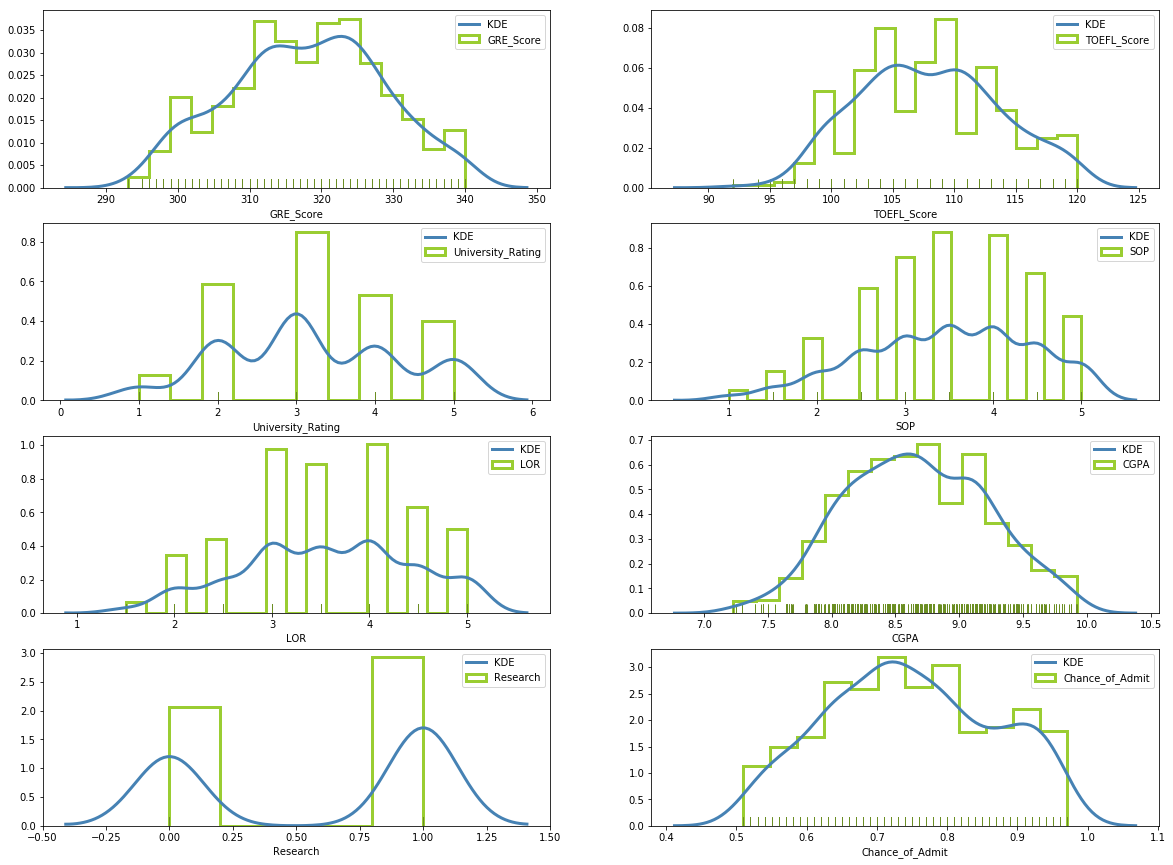

In [20]:
plt.figure(figsize=(20,15))
i = 0

for item in numerical_data.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.distplot(numerical_data[item], rug=True, rug_kws={"color": "olivedrab"},kde=True,
                 kde_kws={"color": "steelblue", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "yellowgreen"},label="{0}".format(item))
#     sns.distplot(admission_v1[item], kde=True,label="{0}".format(item))

plt.show()

*TOEFL Score: The density of TOEFL score are between 100 and 105.*<br>
*GRE Score: There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.*<br>
*University Rating: Most of candidates come from score 3 university, and the candidates of score 2,3,4 are about half of that of score 3.*<br>
*Statement of Purpose: The SoPs are mainly distributed between 2.5 and 5.*<br>
*LOR: For most of candidates, their letters of recommendation are between 3 and 4.*<br>
*CGPA: The CGPA are mainly distributed between 8.0 to 9.5.*<br>

### *Correlation between All Columns*

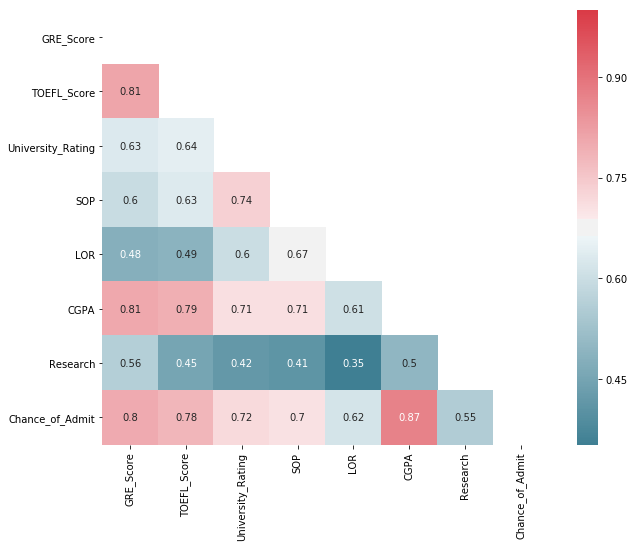

In [21]:
corr_matrix = numerical_data.corr()
plt.figure(figsize = (10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,cmap=cmap,annot=True,mask=mask);

*The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE*<br>
*The 3 least important features for admission to the Master: Research, LOR, and SOP*

### *Understanding the relation between different factors responsible for graduate admissions*

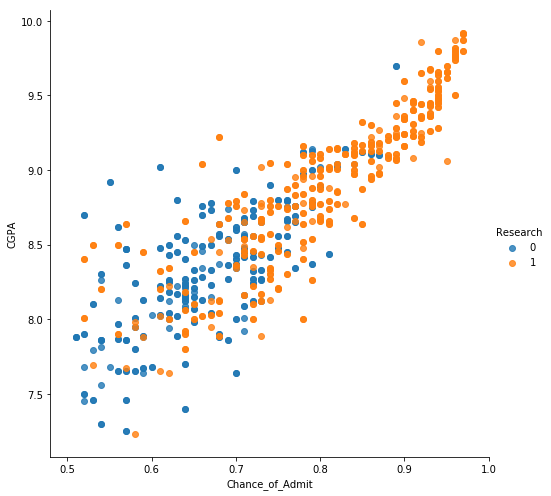

In [22]:
sns.lmplot('Chance_of_Admit', 'CGPA', data=numerical_data, hue='Research', fit_reg=False, height=7);

#### *Highest Admission Based on CGPA in Between 8.5 to 9.0*

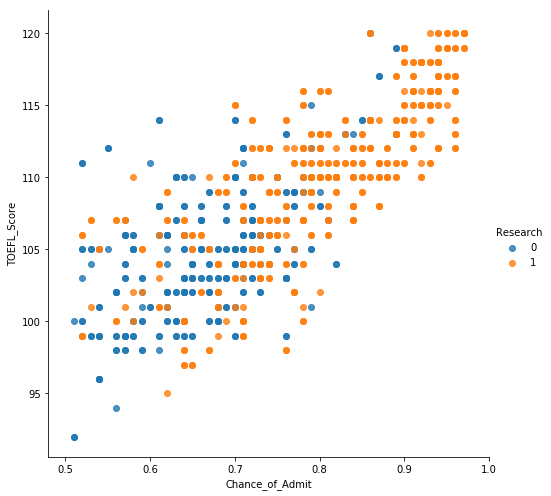

In [23]:
sns.lmplot('Chance_of_Admit','TOEFL_Score', data=numerical_data, hue='Research', fit_reg=False, height=7);

#### *Clutser of TOEFL Score Most value Belongs 97 to 120 and Highest Student of Admission Belong in Between 105 to 110")*

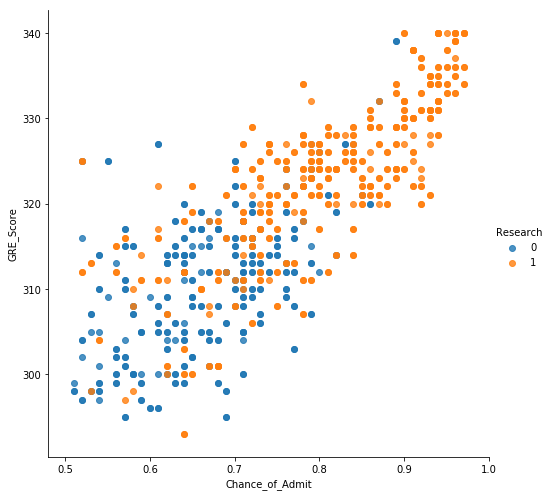

In [24]:
sns.lmplot('Chance_of_Admit','GRE_Score', data=numerical_data, hue='Research', fit_reg=False, height=7);

#### *Clutser of GRE Score is Belong to  300 to 330 and Highest Admission of Score Range in Between 310 to 320*

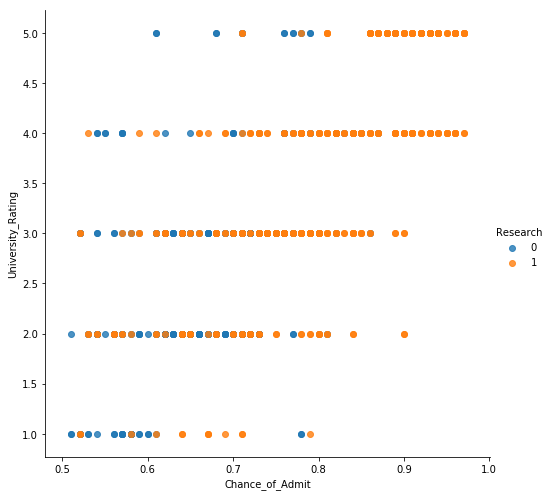

In [25]:
sns.lmplot('Chance_of_Admit','University_Rating', data=numerical_data, hue='Research', fit_reg=False, height=7);

#### *Higer university rating candidates would have a slightly higher chances of admit*

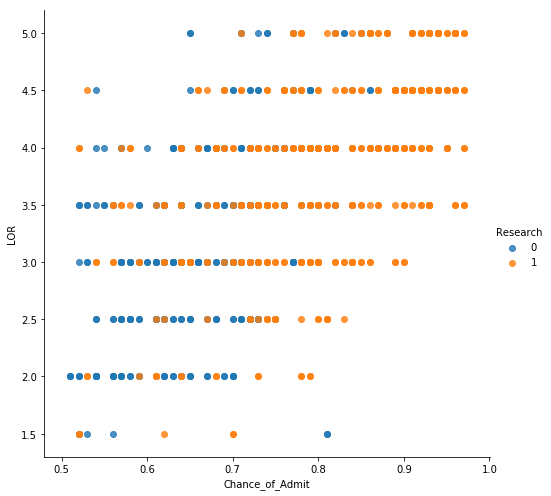

In [26]:
sns.lmplot('Chance_of_Admit','LOR', data=numerical_data, hue='Research', fit_reg=False, height=7);

#### *Higer level LOR candidates would have a higher chances of admit*

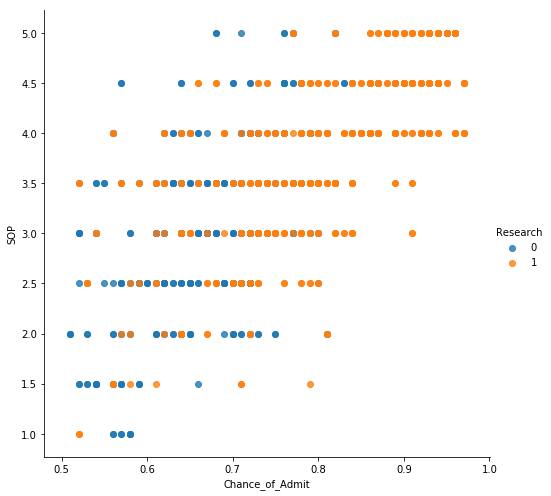

In [27]:
sns.lmplot('Chance_of_Admit','SOP', data=numerical_data, hue='Research', fit_reg=False, height=7);

#### *Higer level SOP candidates would have a higher chances of admit*

### <a name="5_Regression_Analysis"></a>5. Regression Analysis

In [28]:
numerical_data.reset_index()

target = 'Chance_of_Admit' 
IDcol = 'Serial No.'
x_columns = [x for x in df.columns if x not in [target, IDcol]]
X = numerical_data[x_columns]
y = numerical_data['Chance_of_Admit']

##### *train_test_split:*
*It splits the data into random train (80%) and test (20%) subsets.*

In [29]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

##### *Note about r2_score:*
*It is the regression score function.
The best possible score is 1.0 for r2_score.*

#### <a name="5.1_Linear_Regression_Model"></a>5.1 Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)

In [31]:
y_pred_lr = lr.predict(X_test)
r2_score_lr = r2_score(y_test,y_pred_lr)
r2_score_lr

0.808878409741763

#### <a name="5.2_DecisionTree_Regression_Model"></a>5.2 DecisionTree Regression Model

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train,y_train)

In [33]:
y_pred_tree = dt.predict(X_test)
r2_score_dt = r2_score(y_test,y_pred_tree)
r2_score_dt

0.8343516381403084

#### <a name="5.3_Random_Forest_Regression_Model"></a>5.3 Random Forest Regression Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=3)
# Fit the random search model
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [37]:
print('Best Parameters from fitting the random research:\n')
rf_random.best_params_

Best Parameters from fitting the random research:



{'n_estimators': 90,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': False}

In [38]:
rf = RandomForestRegressor(n_estimators=90, max_depth=30, max_features='sqrt', bootstrap=False)
rf = rf.fit(X_train,y_train)

In [39]:
y_pred_rf = rf.predict(X_test)
r2_score_rf = r2_score(y_test,y_pred_rf)
r2_score_rf

0.9289139299548711

#### <a name="5.4_KNeighbors_Model"></a>5.4 KNeighbors Model

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

Find the optimal K value 

In [41]:
k_list = list(range(1,51))
cv_scores = []

for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

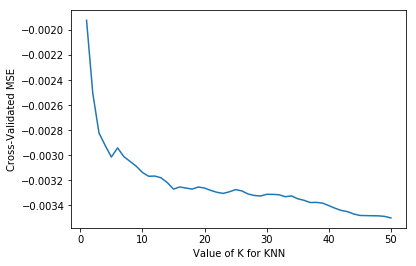

In [42]:
plt.plot(k_list, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [43]:
MSE = [x for x in cv_scores]

In [44]:
best_k = k_list[MSE.index(min(MSE))]
print("The best number of neighbors K is %d." % best_k)

The best number of neighbors K is 50.


In [45]:
knn = KNeighborsRegressor(n_neighbors=50)
knn = knn.fit(X_train,y_train)

In [46]:
y_pred_knn = knn.predict(X_test)
r2_score_knn = r2_score(y_test,y_pred_knn)
r2_score_knn

0.7026558309069666

#### <a name="5.5_SVM_Model"></a>5.5 SVM Model

In [47]:
from sklearn.svm import SVR

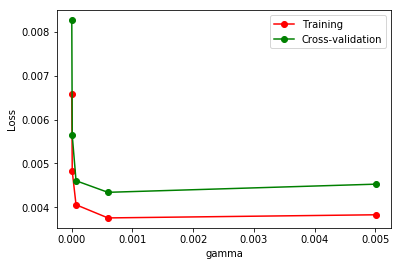

In [48]:
from sklearn.model_selection import  validation_curve

param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(
        SVR(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color="r",label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")

In [49]:
# From the graph above, we can see that the model would have the least loss when gamma is around 0.008
svm = SVR(gamma=0.0008).fit(X_train,y_train)

In [50]:
y_pred_svm = svm.predict(X_test)
r2_score_svm = r2_score(y_test,y_pred_svm)
r2_score_svm

0.7371237578493038

#### <a name="5.6_OLS_Model"></a>5.6 OLS Model

In [51]:
import statsmodels.formula.api as smf
%matplotlib inline

In [52]:
ols = smf.ols('Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + CGPA + Research',data=numerical_data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     529.9
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          7.72e-299
Time:                        17:18:05   Log-Likelihood:                 1297.4
No. Observations:                 826   AIC:                            -2579.
Df Residuals:                     818   BIC:                            -2541.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0140      0.07

In [53]:
ols.rsquared

0.8193049768880398

#### *Printing R2 Score for each model*
#### *Visualizing and comparing results*

In [55]:
models = [['DecisionTree :',dt],
           ['Linear Regression :', lr],
           ['RandomForest :',rf],
           ['KNN :', knn],
           ['SVM :', svm]]

print("R2 Score for each model:")
for name,model in models:
    model = model
    predictions = model.predict(X_test)
    print(name, (r2_score(y_test, predictions)))
    
print('Ordinary Least Squares:', ols.rsquared)    

R2 Score for each model:
DecisionTree : 0.8343516381403084
Linear Regression : 0.808878409741763
RandomForest : 0.9289139299548711
KNN : 0.7026558309069666
SVM : 0.7371237578493038
Ordinary Least Squares: 0.8193049768880398


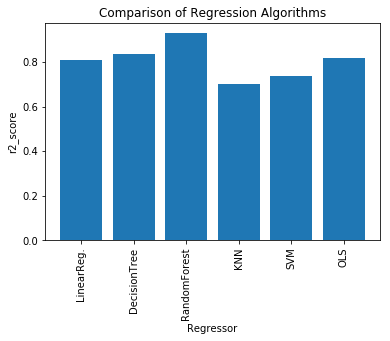

In [56]:
y = np.array([r2_score_lr,r2_score_dt,r2_score_rf,r2_score_knn, r2_score_svm,ols.rsquared])
x = ["LinearReg.","DecisionTree","RandomForest","KNN","SVM","OLS"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.xticks(rotation=90)
plt.show()

### *The best model is Random Forest which has the highest R2 score ( 0.93 )*

### <a name="6_Conclusion_and_Summary"></a>6. Conclusion and Summary

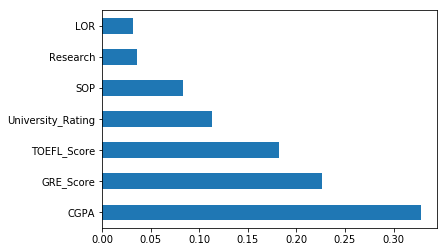

In [57]:
feature_importances = pd.Series(rf.feature_importances_, index=x_columns)
feature_importances.nlargest(7).plot(kind='barh')

### *The importances of  variables are presented above,  and GPA is the most important parameter*#### 
*CGPA: 0.35*<br>
*GRE SCORE: 0.23*<br>
*TOEFL SCORE: 0.18*<br>
*UNIVERSITY RATING: 0.11*<br>
*SOP: 0.09*<br>
*RESEARCH: 0.03*<br>
*LOR: 0.02*<br>

In [58]:
# Predicting the Rating values for testing data
PredAdmit = rf.predict(X_test)

# Creating a DataFrame of Zomato Testing data
AdmitData=pd.DataFrame(X_test, columns=x_columns)
AdmitData['ChancesOfAdmit']=y_test
AdmitData['PredictedChancesOfAdmit']=PredAdmit
AdmitData.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChancesOfAdmit,PredictedChancesOfAdmit
Serial No.,,,,,,,,,
32,327,103,3,4.0,4.0,8.30,1,0.74,0.666000
448,320,108,3,3.5,5.0,8.97,1,0.84,0.794111
142,332,118,2,4.5,3.5,9.36,1,0.90,0.900000
35,331,112,5,4.0,5.0,9.80,1,0.94,0.940000
157,315,105,3,2.0,2.5,8.34,0,0.70,0.702222


In [59]:
# Calculating the Absolute Percentage Error committed in each prediction
AdmitData['APE']=100 * (abs(AdmitData['ChancesOfAdmit'] - AdmitData['PredictedChancesOfAdmit'])/AdmitData['ChancesOfAdmit'])
# Final accuracy of the model
print('Mean Absolute Percent Error(MAPE): ',round(np.mean(AdmitData['APE'])), '%')
print('Average Accuracy of the model: ',100 - round(np.mean(AdmitData['APE'])), '%')

Mean Absolute Percent Error(MAPE):  2 %
Average Accuracy of the model:  98 %


### The most important parameter is CGPA <br> The model is 98% accurate to predict admission status of a candidates